In [1]:
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import numpy as np


In [2]:
DATADIR = 'DAtaset/Train'


In [3]:
CATEGORIES = ['benign']# 'malignant'

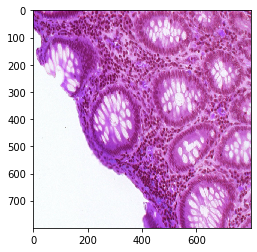

In [4]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array.shape)

(800, 800, 3)


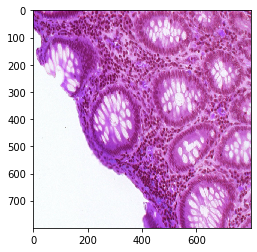

In [6]:
IMG_SIZE = 800

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    count = 0
    for category in CATEGORIES:
       
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        
        for img in tqdm(os.listdir(path)):
            count +=1
             
            
            
            try:
                
                
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_ANYCOLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            file_name_path = "Dataset/Test"+str(count)+'.jpg'
            cv2.imwrite(file_name_path,new_array)
create_training_data()

print(len(training_data))

100%|██████████| 74/74 [00:01<00:00, 41.54it/s]

74


In [8]:
tt

NameError: name 'tt' is not defined

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)